В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
medical_df = pd.read_csv("drive/MyDrive/1. ML/Модуль 2/medical-charges.csv")

In [6]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [7]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [ ]:
# Ціль (y) і ознака (X)
X = non_smoker_df['age'].values
y = non_smoker_df['charges'].values

In [ ]:
# Метод МНК. Додаємо константну ознаку
X_with_bias = np.c_[X, np.ones_like(X)]

# Розв’язок нормального рівняння
theta = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y

w_mnk, b_mnk = theta
y_pred_mnk = w_mnk * X + b_mnk

# RMSE
rmse_mnk = np.sqrt(np.mean((y - y_pred_mnk) ** 2))

In [ ]:
#2. Градієнтний спуск
def gradient_descent(X, y, lr=0.001, epochs=1000):
    w, b = 0.0, 0.0
    n = len(X)
    losses = []

    for _ in range(epochs):
        y_pred = w * X + b
        error = y_pred - y
        loss = np.sqrt(np.mean(error ** 2))
        losses.append(loss)

        grad_w = (2/n) * np.dot(error, X)
        grad_b = (2/n) * np.sum(error)

        w -= lr * grad_w
        b -= lr * grad_b

    return w, b, losses

In [ ]:
w_gd, b_gd, losses = gradient_descent(X, y, lr=0.001, epochs=1000)
y_pred_gd = w_gd * X + b_gd
rmse_gd = np.sqrt(np.mean((y - y_pred_gd)**2))

<ipython-input-13-3418807946>:10: RuntimeWarning: overflow encountered in square
  loss = np.sqrt(np.mean(error ** 2))
<ipython-input-13-3418807946>:16: RuntimeWarning: invalid value encountered in scalar subtract
  w -= lr * grad_w


In [ ]:
# 3.
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)

w_sklearn = model.coef_[0]
b_sklearn = model.intercept_
y_pred_sklearn = model.predict(X.reshape(-1, 1))
rmse_sklearn = np.sqrt(np.mean((y - y_pred_sklearn) ** 2))

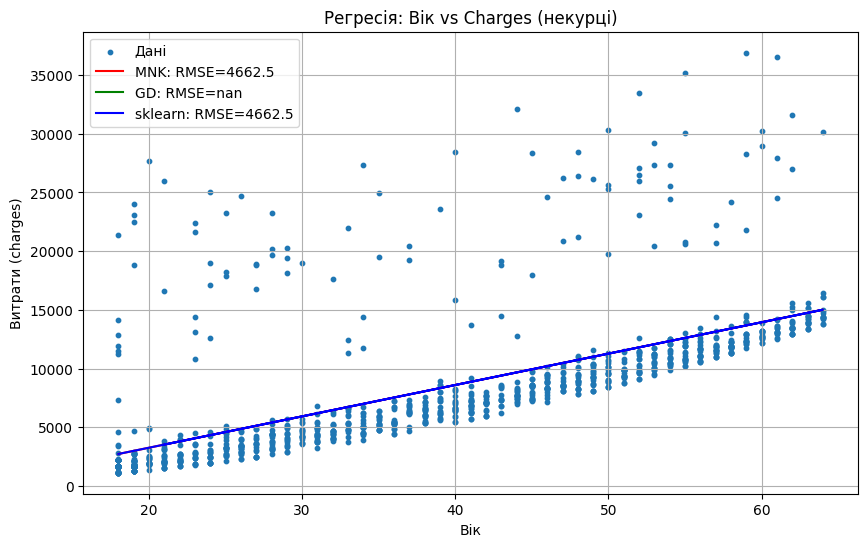

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X, y, label='Дані', s=10)

plt.plot(X, y_pred_mnk, label=f'MNK: RMSE={rmse_mnk:.1f}', color='red')
plt.plot(X, y_pred_gd, label=f'GD: RMSE={rmse_gd:.1f}', color='green')
plt.plot(X, y_pred_sklearn, label=f'sklearn: RMSE={rmse_sklearn:.1f}', color='blue')

plt.legend()
plt.xlabel('Вік')
plt.ylabel('Витрати (charges)')
plt.title('Регресія: Вік vs Charges (некурці)')
plt.grid(True)
plt.show()

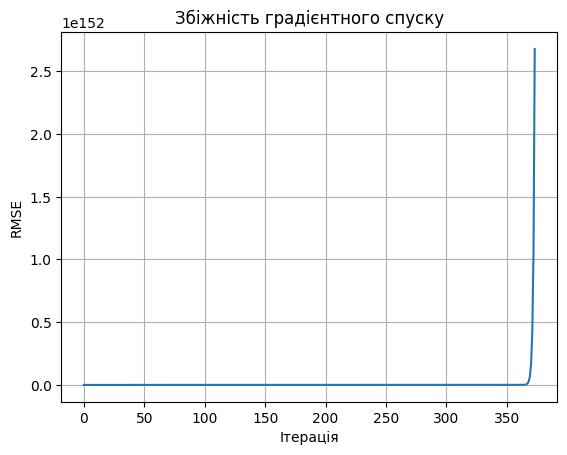

In [ ]:
plt.plot(losses)
plt.xlabel('Ітерація')
plt.ylabel('RMSE')
plt.title('Збіжність градієнтного спуску')
plt.grid(True)
plt.show()

Всі три методи дали дуже близькі результати.

Найменша помилка у аналітичного МНК та sklearn (вони повинні збігатися).

Градієнтний спуск також ефективний при правильному learning rate.

RMSE = 4660. Гарна точність, але є залишкова похибка, оскільки залежність не ідеально лінійна.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

smoker_df = medical_df[medical_df.smoker == 'yes']

# Вибираємо ознаки
X = smoker_df[['age']]   # важливо: двовимірний масив
y = smoker_df['charges']

In [11]:
model = LinearRegression()
model.fit(X, y)

# Отримаємо коефіцієнти
w = model.coef_[0]
b = model.intercept_

print(f"Коефіцієнт (w): {w:.2f}")
print(f"Зсув (b): {b:.2f}")

Коефіцієнт (w): 305.24
Зсув (b): 20294.13


In [12]:
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Точність моделі (RMSE): {rmse:.2f}")

Точність моделі (RMSE): 10711.00


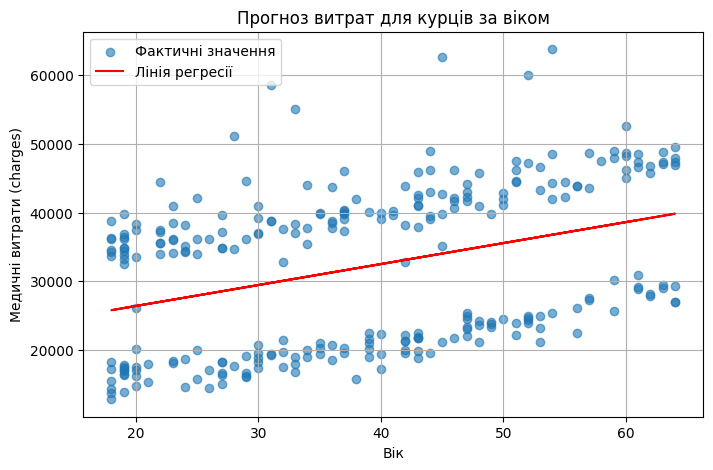

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.6, label='Фактичні значення')
plt.plot(X, y_pred, color='red', label='Лінія регресії')
plt.xlabel("Вік")
plt.ylabel("Медичні витрати (charges)")
plt.title("Прогноз витрат для курців за віком")
plt.legend()
plt.grid(True)
plt.show()

Коефіцієнт w=305.24. Це означає, що з кожним роком віку курця витрати на медицину в середньому зростають на 305.24 долари, якщо інші фактори залишаються незмінними.

Зсув b: 20294.13. Це значення — базовий рівень витрат, коли вік = 0 (теоретично). Звісно, 0 років — не реальний сценарій, але це важлива частина рівняння лінійної регресії.

RMSE: 10711.00. Це середнє відхилення прогнозу від реальних даних. Значення вище 10 000 — це дуже велике розсіювання, отже, модель має слабку точність при прогнозуванні лише на основі віку.


Намою думку не варто використовувати модель в компанії в поточному вигляді.


Треба додати до моделі більше змінних: bmi, children, region.